In [8]:
# DS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import mplcyberpunk
plt.style.use('cyberpunk')

# PLOTLY
import plotly.offline as po
import plotly.graph_objs as go

# SKLEARN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score, plot_roc_curve, log_loss
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Modules
from src.data_clean import *
from src.helpers import *

# GLOBAL VARS
FSIZE = (12, 8)

In [5]:
# Original Data
original = data_cleaner(pd.read_csv("data/churn_train.csv"))
# Create X, y arrays from dataframe
X_pre = original
y_pre = original.pop("target")


In [6]:
churn = data_cleaner(pd.read_csv("data/churn_train.csv"))

In [7]:
# Create X, y arrays from dataframe
X = churn
y = churn.pop("target")


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)    

In [13]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state = 50, max_iter=200)

In [14]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#Predict the value for new, unseen data
pred = logmodel.predict(X_test)


In [17]:
log_loss(y_test, pred)

9.842609438666091

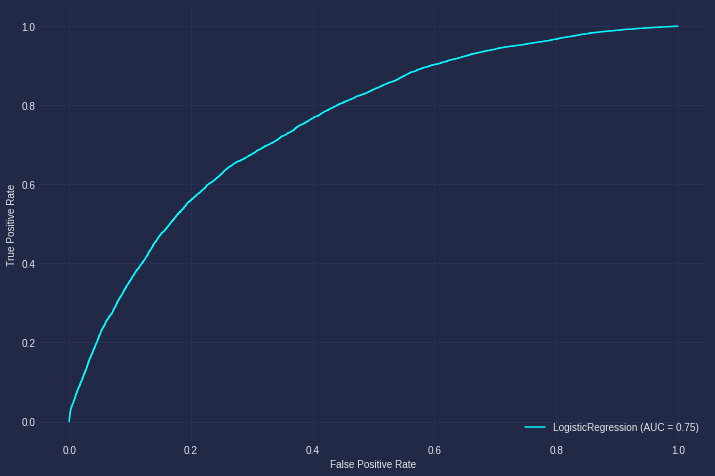

In [19]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=FSIZE)
plot_roc_curve(logmodel, X_train, y_train, ax=ax)

The **odds ratio** is the ratio of the of the probability of the positive to the negative case, i.e., 

$$OR = \frac{P(y=1)}{1-P(y=1)}$$

The logistic function takes the log odds of something and returns the probability.

In [65]:
logmodel.coef_.reshape(10,)

array([ 0.02922442,  0.17615038,  0.09362134, -0.03939987, -0.10705054,
       -0.90566244, -0.00143664,  0.74789915, -1.04025473,  0.17355884])

In [51]:
np.concatenate([np.array(X.columns), logmodel.coef_.reshape(10,)])

array(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user',
       'weekday_pct', 'city_Astapor', "city_King's Landing",
       'city_Winterfell', 0.029224416856357356, 0.17615038386273227,
       0.09362134232638056, -0.03939987470134641, -0.10705053585804569,
       -0.905662438594761, -0.0014366429703468323, 0.747899147308533,
       -1.040254733404036, 0.17355883667426092], dtype=object)

In [64]:
np.array(X.columns).shape

(10,)

In [81]:
arr = dict(zip(np.array(X.columns), logmodel.coef_.reshape(10,)))
arr

{'avg_dist': 0.029224416856357356,
 'avg_rating_by_driver': 0.17615038386273227,
 'avg_rating_of_driver': 0.09362134232638056,
 'surge_pct': -0.03939987470134641,
 'trips_in_first_30_days': -0.10705053585804569,
 'luxury_car_user': -0.905662438594761,
 'weekday_pct': -0.0014366429703468323,
 'city_Astapor': 0.747899147308533,
 "city_King's Landing": -1.040254733404036,
 'city_Winterfell': 0.17355883667426092}

In [73]:
df = pd.DataFrame(data = logmodel.coef_, columns = [np.array(X.columns)])

In [85]:
logmodel.coef_.reshape(10,)

array([ 0.02922442,  0.17615038,  0.09362134, -0.03939987, -0.10705054,
       -0.90566244, -0.00143664,  0.74789915, -1.04025473,  0.17355884])

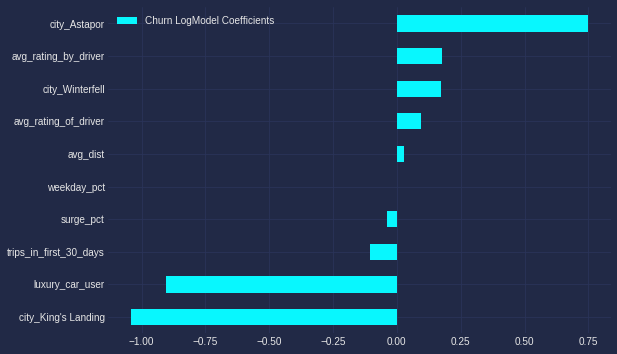

In [101]:
# Feature Importances
#fig, ax = plt.subplots(figsize=(20,20))
# See and plot feature importances 
feat_scores = pd.DataFrame({'Churn LogModel Coefficients' : logmodel.coef_.reshape(10,)},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn LogModel Coefficients')
feat_scores.plot(kind='barh', figsize=(9, 6))